In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 503 kB 40.3 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 3.8 MB 42.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4c5cfda1a0fc820504d6b094d79455d1088ba1c1e41a1c10297cb05fb1a9198e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 14.4 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=44d2078bc8335891c8219881bb3036bd5ee4e9059be79c67a7c5b92ac3355382
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3440640/45929032 bytes (7.5%)7503872/45929032 bytes (16.3%)11583488/45929032 bytes (25.2%)15826944/45929032 bytes (34.5%)19677184/45929032 bytes (42.8%)23797760/45929032 bytes (51.8%)27713536/45929032 bytes (60.3%)31768576/45929032 bytes (69.2%)35692544/45929032 bytes (77.7%)38723584/45929032 bytes (84.3%)41934848/45929032 bytes (91.3%)44908544/45929032 bytes (97.8%)

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def fraction(x,y):
  return (x/100,y/100)

import math
def midpointCircle(a,b,r):
  gl.glColor3f(1,0,1)
  gl.glPointSize(1)
  gl.glBegin(gl.GL_POINTS)
  a,b=fraction(a,b)
  x=0
  y=r
  d=0.001-r

  while x<y:
    m=x
    n=y
    m,n=fraction(x,y)
    gl.glVertex2f(n+a,m+b)#0
    gl.glVertex2f(m+a,n+b)#1
    gl.glVertex2f(-m+a,n+b)#2
    gl.glVertex2f(-n+a,m+b)#3
    gl.glVertex2f(-n+a,-m+b)#4
    gl.glVertex2f(-m+a,-n+b)#5
    gl.glVertex2f(m+a,-n+b)#6
    gl.glVertex2f(n+a,-m+b)#7
    if d>=0:
      #SE
      d=d+2*x-2*y+0.005
      x+=0.001
      y-=0.001
    else:
      #E
      d=d+2*x+0.003
      x+=0.001
  gl.glEnd()

def smallCircles(a,b,r):
  midpointCircle(a+(r/2),b,r/2)
  midpointCircle(a-(r/2),b,r/2)
  midpointCircle(a,b+(r/2),r/2)
  midpointCircle(a,b-(r/2),r/2)
  #corner
  formula=math.sqrt(r**2/8)
  midpointCircle(a+formula,b+formula,r/2)
  midpointCircle(a-formula,b+formula,r/2)
  midpointCircle(a+formula,b-formula,r/2)
  midpointCircle(a-formula,b-formula,r/2)


midpointCircle(0,0,45)
smallCircles(0,0,45)



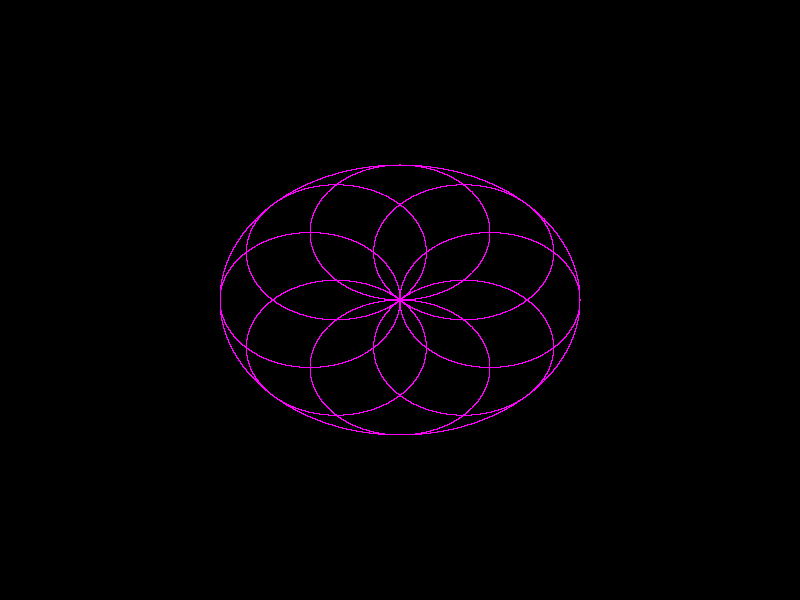

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)